# Project: Learning to Label – From Clustering to Classification text
In the real world, data rarely comes with clean labels. As a machine learning engineer at a data-centric company, you’re handed fairly large, unlabelled datasets across two domains—images and text. Your team is tasked with building a functional classification system, but without labeled training data, the first challenge is to create your own labels. Welcome to your mission: learning to label intelligently and building robust classifiers from scratch.

This project simulates the workflow of a modern unsupervised-to-supervised machine learning pipeline. It is structured in two stages, each of which builds upon the other:

# Text Dataset

In [1]:
import pickle
import pandas as pd

original_text_df = pickle.load(open('train_data_text.pkl', 'rb'))
text_df= pd.DataFrame(original_text_df, columns=['text'])

In [2]:
# remove stop words and lemmatize

import nltk
nltk.download('stopwords')
import re

def process_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    lemmatizer= WordNetLemmatizer()
    stop_words= set(stopwords.words('english'))
    text= text.lower()
    processed_text= re.sub(r'[^a-zA-Z0-9\s]','',text)

    token= [ lemmatizer.lemmatize(word) for word in processed_text.split() if word not in stop_words]
    return ' '.join(token)

text_df['processed_text']= text_df['text'].apply(process_text)
text_df 

[nltk_data] Downloading package stopwords to /home/ruksad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  
0     article 93089204431grv101psuvmpsuedu callec dr...  
1     article 1993apr191311027843rchlandibmcom xzz02...  
2     get little uv putting heavy uv filter deep pur...  
3     nntppostinghost accessdigexnet trouble trying ...  
4     understand new gps box option known differenti...  
...                                                 ...  
1495  nntppostinghost wcsubctstateuedu organization ...  
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...  
1497  article 79895cupportalcom thyagicupportalcom t...  
1498  3500 mile black leather tank bra tank bag corb...  
1499  nntppostinghost grissomlarcnasagov article 199...  

[1500 rows x 2 columns]

# create different vectors using vectorization techniques.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def count_vectorize(df):
    vectorizer= CountVectorizer()
    vectors= vectorizer.fit_transform(df['processed_text']).toarray()
    df['count_vector']= list(vectors)
    return vectors, vectorizer.vocabulary_

def tfidf_vectorizer(df):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
    df['tfidf_vector'] = list(tfidf_vectors)
    return tfidf_vectors

def word2Vec_vectorizer(df):
    from gensim.models import Word2Vec

    # Train the Word2Vec model
    model = Word2Vec(sentences=df['processed_text'].apply(lambda x: x.split()), vector_size=250, window=5, min_count=1, workers=4)

    # Function to vectorize text using the Word2Vec model
    def vectorize(text):
        words = text.split()
        # Compute the mean of word vectors, or use a zero vector if no words are in the vocabulary
        return np.mean([model.wv[word] for word in words if word in model.wv.key_to_index] or [np.zeros(model.vector_size)], axis=0)

    # Apply the vectorization function to the processed_text column
    df['word2vec'] = df['processed_text'].apply(vectorize)
    return np.array(df['word2vec'].tolist())


In [4]:
# Generate vectorizations 
count_vectors, count_vectorizer_vocab = count_vectorize(text_df)
tfidf_vectors = tfidf_vectorizer(text_df)
word2vec_vectors = word2Vec_vectorizer(text_df)

text_df 


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                           count_vector  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1495  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1496  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1497  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1498  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1499  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           tfidf_vector  \
0     [0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
1495  [0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...   
1496  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1497  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1498  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1499  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               word2vec  
0     [0.27137354, -0.10604877, 0.25689217, 0.143565...  
1     [0.31893238, -0.12851031, 0.29930255, 0.166313...  
2     [0.24452998, -0.09522265, 0.23806511, 0.136261...  
3     [0.2356204, -0.090517946, 0.22320183, 0.124350...  
4     [0.23127235, -0.088420026, 0.2241692, 0.126270...  
...                                                 ...  
1495  [0.23887803, -0.09352351, 0.22442293, 0.124724...  
1496  [0.3380666, -0.13245563, 0.32322606, 0.1819591...  
1497  [0.24616726, -0.09699149, 0.23305072, 0.129512...  
1498  [0.22775218, -0.08808867, 0.21978259, 0.123303...  
1499  [0.21856277, -0.08679223, 0.19814917, 0.107973...  

[1500 rows x 5 columns]

In [7]:

# # Save the vectorized data
# np.save('count_vectors.npy', count_vectors)
# np.save('tfidf_vectors.npy', tfidf_vectors)
# np.save('word2vec_vectors.npy', word2vec_vectors)
# # Save the vectorizer   
#with open('count_vectorizer.pkl', 'wb') as f:
#    pickle.dump(count_vectorizer_vocab, f)
# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)    
# # Save the processed text data
# text_df.to_csv('processed_text.csv', index=False)
# # Save the original text data
# original_text_df.to_csv('original_text.csv', index=False)

In [5]:
# Apply KMeans clustering to count_vector, tfidf_vector, and word2vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# KMeans for count_vector
kmeans_count = KMeans(n_clusters=5, random_state=42)
text_df['count_vector_cluster'] = kmeans_count.fit_predict(np.array(text_df['count_vector'].tolist()))
kmeans_count_lables= kmeans_count.labels_

# KMeans for tfidf_vector
kmeans_tfidf = KMeans(n_clusters=5, random_state=42)
text_df['tfidf_vector_cluster'] = kmeans_tfidf.fit_predict(np.array(text_df['tfidf_vector'].tolist()))
kmeans_tfidf_lables= kmeans_tfidf.labels_

# KMeans for word2vec
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
text_df['word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(text_df['word2vec'].tolist()))
kmeans_word2vec_lables= kmeans_word2vec.labels_

summary_metrics= pd.DataFrame({
    "Vector Method": ["count-vector", "tf-idf-vector", "word2vec"],
    "Inertia": [
        kmeans_count.inertia_,
        kmeans_tfidf.inertia_,
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        silhouette_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        silhouette_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
        ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        calinski_harabasz_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        calinski_harabasz_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        davies_bouldin_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        davies_bouldin_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ]
})

summary_metrics

Vector Method        Inertia  Silhouette Score  Calinski-Harabasz Index  \
0   count-vector  517240.963710          0.882211               579.737830   
1  tf-idf-vector    1386.797543          0.197187               144.834122   
2       word2vec      68.238777          0.504254              1919.988083   

   Davies-Bouldin Index  
0              1.234039  
1              1.430685  
2              0.637903

In [6]:
text_df

text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                           count_vector  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1495  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1496  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1497  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1498  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1499  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           tfidf_vector  \
0     [0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
1495  [0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...   
1496  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1497  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1498  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1499  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               word2vec  count_vector_cluster  \
0     [0.27137354, -0.10604877, 0.25689217, 0.143565...                     0   
1     [0.31893238, -0.12851031, 0.29930255, 0.166313...                     0   
2     [0.24452998, -0.09522265, 0.23806511, 0.136261...                     0   
3     [0.2356204, -0.090517946, 0.22320183, 0.124350...                     0   
4     [0.23127235, -0.088420026, 0.2241692, 0.126270...                     0   
...                                                 ...                   ...   
1495  [0.23887803, -0.09352351, 0.22442293, 0.124724...                     0   
1496  [0.3380666, -0.13245563, 0.32322606, 0.1819591...                     0   
1497  [0.24616726, -0.09699149, 0.23305072, 0.129512...                     0   
1498  [0.22775218, -0.08808867, 0.21978259, 0.123303...                     0   
1499  [0.21856277, -0.08679223, 0.19814917, 0.107973...                     0   

      tfidf_vector_cluster  word2vec_cluster  
0                        3                 0  
1                        1                 1  
2                        2                 3  
3                        3                 3  
4      

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
# Method 1: Apply t-SNE
def apply_tsne(data, n_components=2, random_state=42):
    """
    Applies t-SNE to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for t-SNE.
        random_state (int): Random state for reproducibility.
    
    Returns:
        numpy.ndarray: t-SNE reduced data.
    """
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(data)

# Method 2: Apply PCA
def apply_pca(data, n_components=2):
    """
    Applies PCA to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for PCA.
    
    Returns:
        numpy.ndarray: PCA reduced data.
    """
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

def apply_umap(data, n_components=2, random_state=42):
    """
    Applies UMAP to reduce data to n_components dimensions.

    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for UMAP.
        random_state (int): Random state for reproducibility.

    Returns:
        numpy.ndarray: UMAP reduced data.
    """
    umap = UMAP(n_components=n_components, random_state=random_state)
    return umap.fit_transform(data)

# Method 3: Plotting
def plot_clusters(ax, data, labels, title, xlabel, ylabel, cmap='viridis', s=10):
    """
    Plots clusters on the given axes.
    
    Parameters:
        ax (matplotlib.axes.Axes): Axes object to plot on.
        data (numpy.ndarray): 2D data to plot (e.g., PCA or t-SNE output).
        labels (numpy.ndarray): Cluster labels for coloring.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        cmap (str): Colormap for the scatter plot.
        s (int): Marker size for the scatter plot.
    """
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, s=s)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return scatter

def plot_barchart(ax, data, labels, title, xlabel, ylabel, color='blue'):
    """
    Plots a bar chart on the given axes.

    Parameters:
        ax (matplotlib.axes.Axes): Axes object to plot on.
        data (list or numpy.ndarray): Data values for the bar chart.
        labels (list or numpy.ndarray): Labels for the bars.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        color (str): Color of the bars.
    """
    ax.bar(labels, data, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/

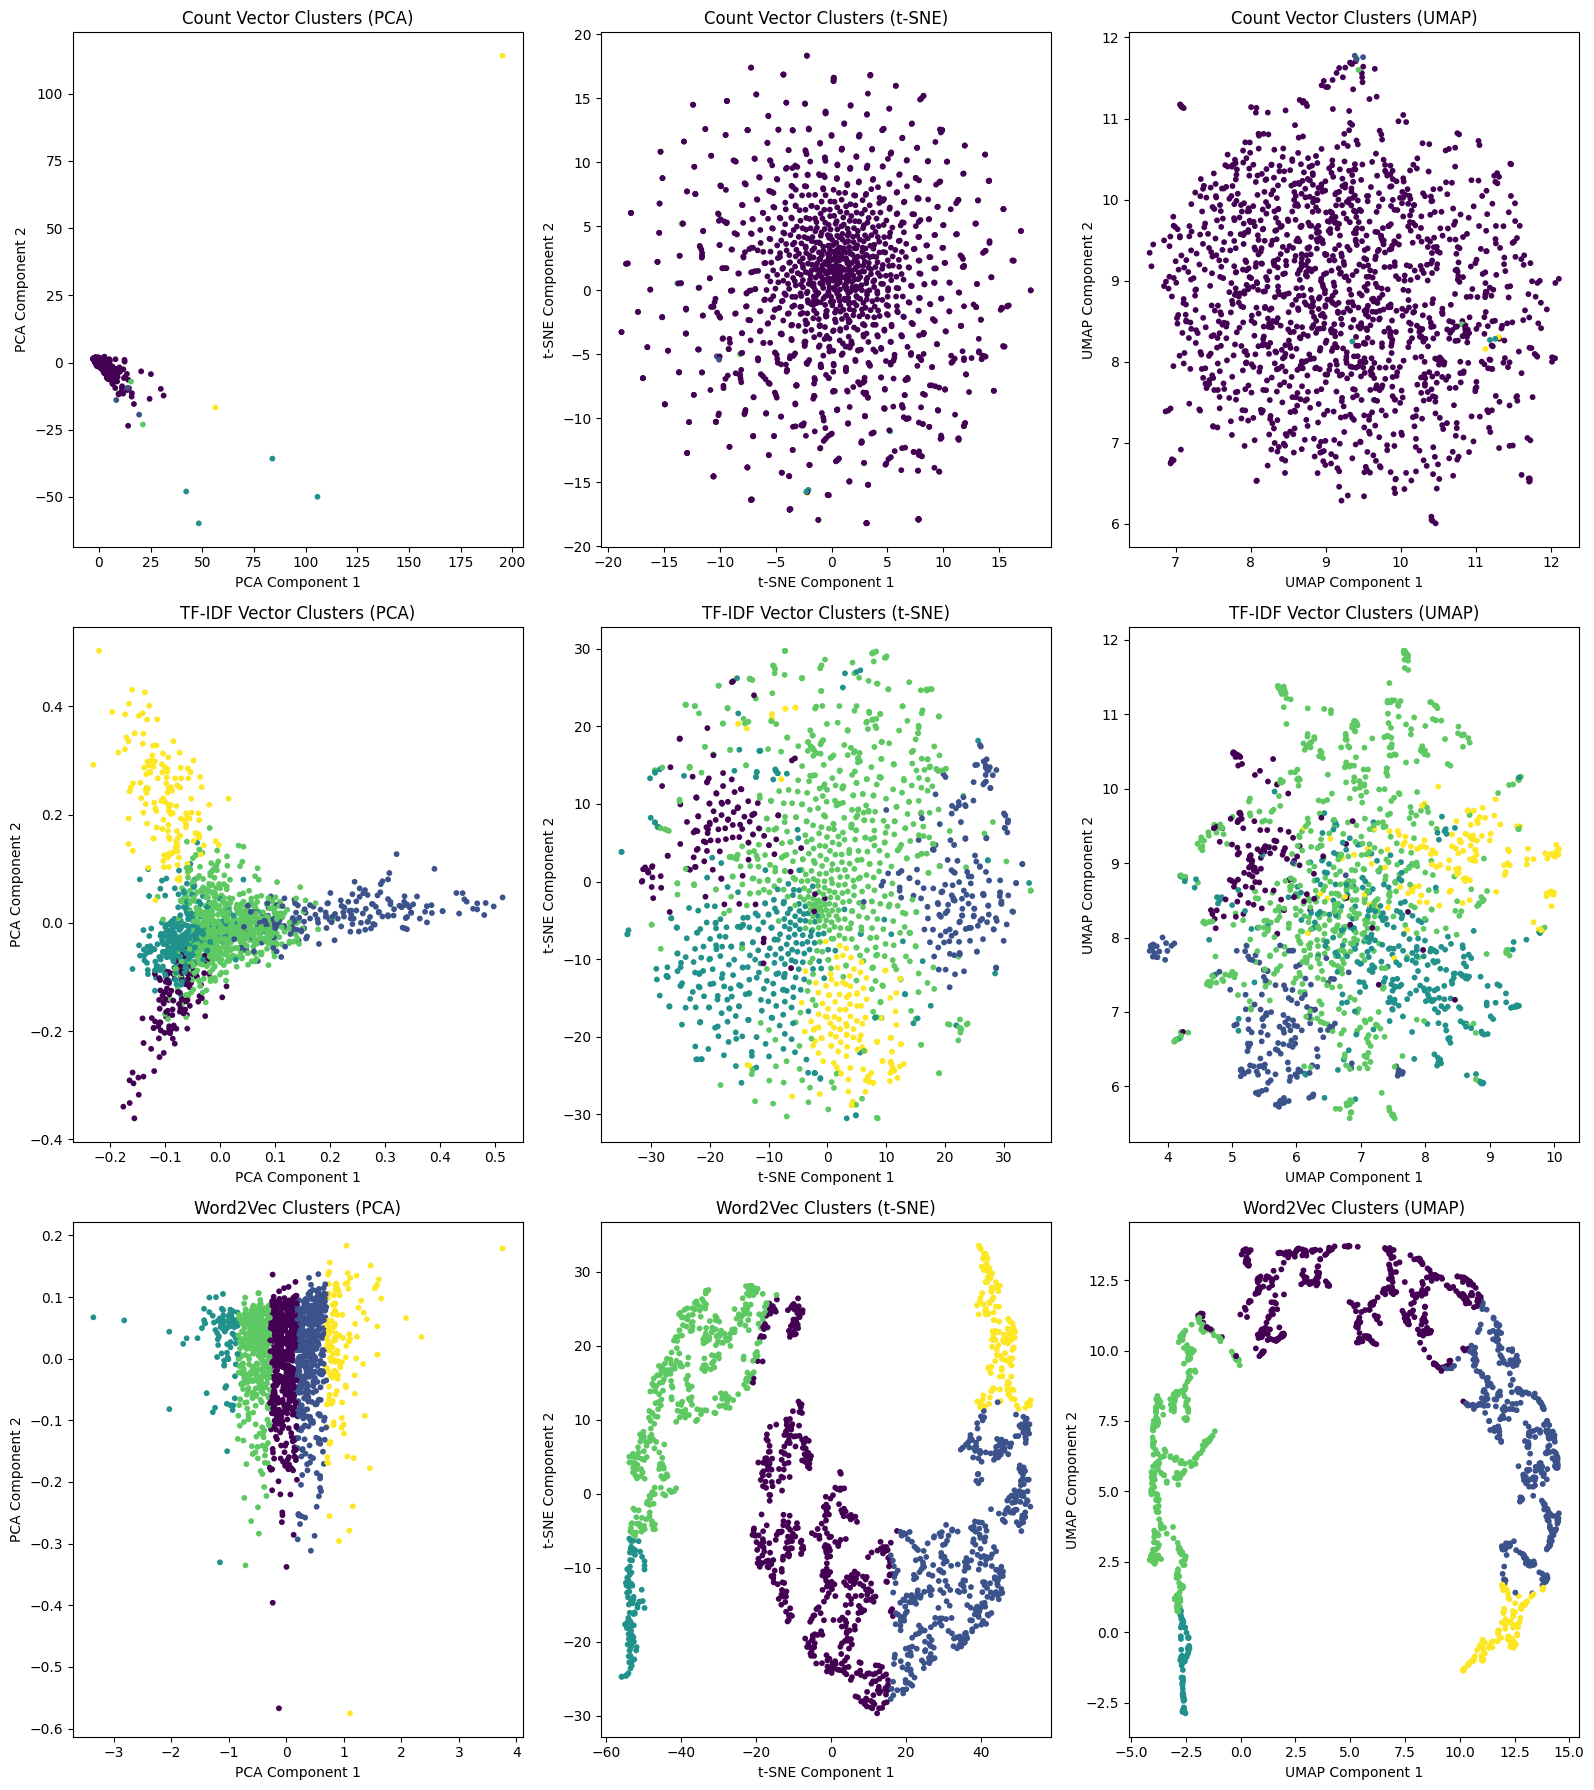

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for all vector types
vector_data = {
    "Count Vector": np.array(text_df['count_vector'].tolist()),
    "TF-IDF Vector": np.array(text_df['tfidf_vector'].tolist()),
    "Word2Vec": np.array(text_df['word2vec'].tolist())
}

vector_labels = {
    "Count Vector": text_df['count_vector_cluster'],
    "TF-IDF Vector": text_df['tfidf_vector_cluster'],
    "Word2Vec": text_df['word2vec_cluster']
}

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(len(vector_data), 3, figsize=(16, 18))

for i, (vector_name, data) in enumerate(vector_data.items()):
    labels = vector_labels[vector_name]

   
    # Apply PCA
    data_pca = apply_pca(data)

    # Apply t-SNE
    data_tsne = apply_tsne(data)

    # Apply UMAP
    umap_features = apply_umap(data)

    # PCA Visualization  
    plot_clusters(axes[i, 0], data_pca, labels, f"{vector_name} Clusters (PCA)", "PCA Component 1", "PCA Component 2")

    # t-SNE Visualization
    plot_clusters(axes[i, 1], data_tsne, labels, f"{vector_name} Clusters (t-SNE)", "t-SNE Component 1", "t-SNE Component 2")

    # UMAP Visualization
    plot_clusters(axes[i, 2], umap_features, labels, f"{vector_name} Clusters (UMAP)", "UMAP Component 1", "UMAP Component 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

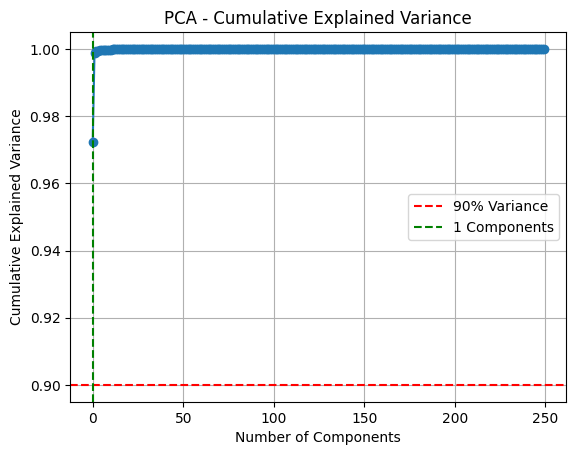

In [34]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Prepare Word2Vec data
word2vec_data = np.array(text_df['word2vec'].tolist())

# Fit PCA to the data
pca = PCA()
pca.fit_transform(word2vec_data)

  # Apply t-SNE
#tsne = TSNE()
#data_tsne = tsne.fit_transform(data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
#print("Explained Variance Ratio:", pca.explained_variance_ratio_," \n shape:",pca.explained_variance_ratio_.shape)
#print(f"Number of components to explain 90% variance: {n_components_90}")

# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90 - 1, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Filter which document belongs to which cluster

In [11]:
# Filter documents belonging to a specific cluster (e.g., cluster 0)
revised_df= text_df.copy()
revised_df.drop(columns=['count_vector','tfidf_vector','count_vector_cluster','tfidf_vector_cluster'], inplace=True)


In [12]:
cluster_0_docs = revised_df[revised_df['word2vec_cluster'] == 0]
print(f"Documents in Cluster 0:")
cluster_0_docs

Documents in Cluster 0:


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
9     \nIn article <15413@optilink.COM> cramer@optil...   
13    Nntp-Posting-Host: thor.isc-br.com\n\nIn artic...   
19    Distribution: usa\nNNTP-Posting-Host: nw12-326...   
25    Nntp-Posting-Host: logic.clarkson.edu\nX-Newsr...   
...                                                 ...   
1485  Nntp-Posting-Host: esun228\nX-Newsreader: TIN ...   
1487  \nI have two books, both NASA Special Publicat...   
1489  \n\n--\n\nI would like to be able to detect th...   
1493  \nIn article <1993Mar25.161909.8110@wuecl.wust...   
1494  \nAaron Lung (alung@megatest.com) wrote:\n: >I...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
9     article 15413optilinkcom crameroptilinkcom cla...   
13    nntppostinghost thoriscbrcom article 16apr1993...   
19    distribution usa nntppostinghost nw123261mited...   
25    nntppostinghost logicclarksonedu xnewsreader t...   
...                                                 ...   
1485  nntppostinghost esun228 xnewsreader tin versio...   
1487  two book nasa special publication voyager miss...   
1489  would like able detect angular position low ac...   
1493  article 1993mar251619098110wueclwustledu dpcec...   
1494  aaron lung alungmegatestcom wrote also sceptic...   

                                               word2vec  word2vec_cluster  
0     [0.27137354, -0.10604877, 0.25689217, 0.143565...                 0  
9     [0.26538518, -0.10801362, 0.23374559, 0.121607...                 0  
13    [0.2768033, -0.10871685, 0.26257583, 0.1476379...                 0  
19    [0.27790844, -0.10854138, 0.26135328, 0.143448...                 0  
25    [0.2549861, -0.09809284, 0.24005656, 0.1342362...                 0  
...                                                 ...               ...  
1485  [0.27659547, -0.10767139, 0.26470265, 0.148953...                 0  
1487  [0.2521525, -0.09777231, 0.24318507, 0.1372857...                 0  
1489  [0.2512829, -0.09654692, 0.24428801, 0.1394934...                 0  
1493  [0.26914817, -0.10503713, 0.25605178, 0.143378...                 0  
1494  [0.2598143, -0.10117698, 0.251267, 0.14331044,...                 0  

[509 rows x 4 columns]

In [13]:
cluster_4_docs = revised_df[revised_df['word2vec_cluster'] == 4]
print(f"Documents in Cluster 4:")
cluster_4_docs

Documents in Cluster 4:


text  \
8     Reply-To: an030@cleveland.Freenet.Edu (Broward...   
10    NNTP-Posting-Host: life.ai.mit.edu\n\n\n\n\n\n...   
16    \nIn article <7912@blue.cis.pitt.edu> joslin@p...   
20    \nIn article <1993Apr21.212202.1@aurora.alaska...   
29    \nWith the continuin talk about the "End of th...   
...                                                 ...   
1480  \nIn <1psg95$ree@access.digex.net> prb@access....   
1483  Distribution: world\nReply-To: egreen@east.sun...   
1490  \nIn article <bskendigC5I9yH.ICp@netcom.com> b...   
1491  NNTP-Posting-Host: access.digex.net\n\nIn arti...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   

                                         processed_text  \
8     replyto an030clevelandfreenetedu broward horne...   
10    nntppostinghost lifeaimitedu white house offic...   
16    article 7912bluecispittedu joslinpogoisppitted...   
20    article 1993apr212122021auroraalaskaedu nsmcaa...   
29    continuin talk end space age complaint governm...   
...                                                 ...   
1480  1psg95reeaccessdigexnet prbaccessdigexcom pat ...   
1483  distribution world replyto egreeneastsuncom nn...   
1490  article bskendigc5i9yhicpnetcomcom bskendignet...   
1491  nntppostinghost accessdigexnet article 1r46j3i...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   

                                               word2vec  word2vec_cluster  
8     [0.3280951, -0.12901807, 0.3131978, 0.17491803...                 4  
10    [0.33930147, -0.13182774, 0.33029082, 0.187087...                 4  
16    [0.33443585, -0.13422436, 0.3140326, 0.1743614...                 4  
20    [0.3541371, -0.13802719, 0.33485547, 0.1866722...                 4  
29    [0.33868703, -0.13032351, 0.32879904, 0.187993...                 4  
...                                                 ...               ...  
1480  [0.330393, -0.12910599, 0.31494144, 0.17617334...                 4  
1483  [0.33087948, -0.12982795, 0.3033328, 0.1624676...                 4  
1490  [0.32986966, -0.13222802, 0.31000564, 0.170295...                 4  
1491  [0.36197034, -0.1502992, 0.30550018, 0.1530433...                 4  
1496  [0.3380666, -0.13245563, 0.32322606, 0.1819591...                 4  

[137 rows x 4 columns]

In [14]:
cluster_2_docs = revised_df[revised_df['word2vec_cluster'] == 2]
print(f"Documents in Cluster 2:")
cluster_2_docs

Documents in Cluster 2:


text  \
14    \n\n\tCould someone mail me the archive locati...   
56    \n\nFor all people that are interested in ever...   
59    \nkosinski@us.oracle.com (Kevin Osinski) write...   
61    \nHere is a press release from the Reserve Off...   
72                               \ncritus\n\n\n\n\n  \n   
...                                                 ...   
1391  \n\n\nARIANESPACE FLIGHT 56\n\n(Flight V.56 wa...   
1411  In-Reply-To: higgins@fnalf.fnal.gov's message ...   
1425  Nntp-Posting-Host: palm21\nOrganization: Cray ...   
1446  \n  I found it very interesting that Atlas dep...   
1455  \nI am selling my Sportster to make room for a...   

                                         processed_text  \
14    could someone mail archive location msf progra...   
56    people interested every aspect 2600 try zine 2...   
59    kosinskiusoraclecom kevin osinski writes recal...   
61    press release reserve officer association rese...   
72                                               critus   
...                                                 ...   
1391  arianespace flight 56 flight v56 originally in...   
1411  inreplyto higginsfnalffnalgovs message 5 apr 9...   
1425  nntppostinghost palm21 organization cray resea...   
1446  found interesting atlas depended pressure main...   
1455  selling sportster make room new flhtcu scoot e...   

                                               word2vec  word2vec_cluster  
14    [0.1925098, -0.07465783, 0.18595733, 0.1067594...                 2  
56    [0.19266607, -0.07475329, 0.18550466, 0.105267...                 2  
59    [0.19198613, -0.07548826, 0.18057899, 0.102081...                 2  
61    [0.18654454, -0.072879374, 0.17942888, 0.10135...                 2  
72    [0.003183198, -0.0028159418, 0.0023493175, 5.6...                 2  
...                                                 ...               ...  
1391  [0.1846678, -0.071392186, 0.17701457, 0.100378...                 2  
1411  [0.18865174, -0.07312413, 0.17665412, 0.099069...                 2  
1425  [0.19053511, -0.07319393, 0.1786609, 0.0998685...                 2  
1446  [0.19478011, -0.075411305, 0.18911345, 0.10687...                 2  
1455  [0.15569481, -0.060075406, 0.15091115, 0.08515...                 2  

[88 rows x 4 columns]

# Visualize Silhouette Scores for Each Cluster

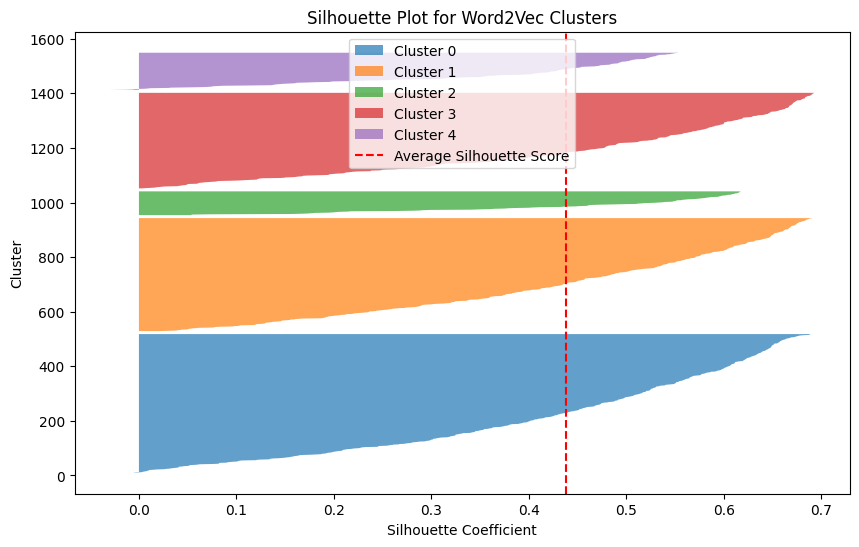

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples


word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels= np.array(revised_df['word2vec_cluster'].tolist())
# Calculate silhouette scores for each document
silhouette_values = silhouette_samples(word2vec_data, word2vec_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Assuming 5 clusters
    ith_cluster_silhouette_values = silhouette_values[word2vec_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i}"
    )
    y_lower = y_upper + 10  # Add space between clusters

plt.axvline(x=silhouette_values.mean(), color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for Word2Vec Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()

# Selective resampling:
1. Oversample Minority Clusters: using SMOTE
2. Undersampling Majority clusters: 

/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


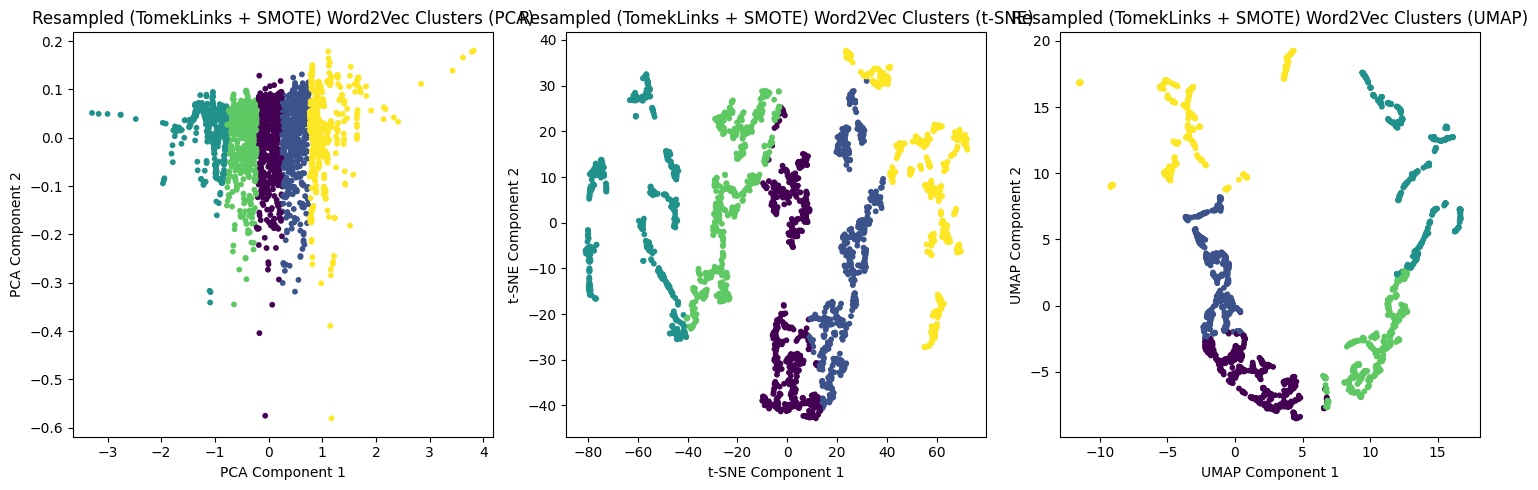

In [17]:
# Resampling 

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Extract Word2Vec data and cluster labels from revised_df
word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels = np.array(revised_df['word2vec_cluster'].tolist())

# Step 1: Apply Tomek Links to remove overlapping samples
tl = TomekLinks()
X_tomek, y_tomek = tl.fit_resample(word2vec_data, word2vec_labels)

# Step 2: Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tomek, y_tomek)

# Create DataFrame for resampled data
resampled_df = pd.DataFrame({
    're_word2vec': list(X_resampled),
    're_word2vec_cluster': list(y_resampled)
})

# Apply PCA, t-SNE, and UMAP on the resampled data
pca_data = apply_pca(X_resampled)
tsne_data = apply_tsne(X_resampled)
umap_data = apply_umap(X_resampled)

# Create subplots for PCA, t-SNE, and UMAP visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA
plot_clusters(
    ax=axes[0],
    data=pca_data,
    labels=y_resampled,
    title="Resampled (TomekLinks + SMOTE) Word2Vec Clusters (PCA)",
    xlabel="PCA Component 1",
    ylabel="PCA Component 2"
)

# Plot t-SNE
plot_clusters(
    ax=axes[1],
    data=tsne_data,
    labels=y_resampled,
    title="Resampled (TomekLinks + SMOTE) Word2Vec Clusters (t-SNE)",
    xlabel="t-SNE Component 1",
    ylabel="t-SNE Component 2"
)

# Plot UMAP
plot_clusters(
    ax=axes[2],
    data=umap_data,
    labels=y_resampled,
    title="Resampled (TomekLinks + SMOTE) Word2Vec Clusters (UMAP)",
    xlabel="UMAP Component 1",
    ylabel="UMAP Component 2"
)

plt.tight_layout()
plt.show()


In [18]:
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
resampled_df['re_word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(resampled_df['re_word2vec'].tolist()))
kmeans_word2vec_lables = kmeans_word2vec.labels_

summary_metrics = pd.DataFrame({
    "Vector Method": ["word2vec"],
    "Inertia": [
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ]
})

summary_metrics

Vector Method     Inertia  Silhouette Score  Calinski-Harabasz Index  \
0      word2vec  145.016006          0.517361              5861.912323   

   Davies-Bouldin Index  
0              0.582891

due to resampling performance metrices of the model drops, so dropping the resampling and 
If class imbalance is a concern for classification:
1. Use classifier-level techniques like class weights
2. Try probability calibration methods
3. Consider ensemble methods that handle imbalance well (like XGBoost)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns

def min_sample_leaf(df, target_column):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier

    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    param_grid = {'min_samples_leaf': [1, 2, 5, 10, 20]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])


def evaluate_model(df, target_column, classifier):
    """
    Splits the data, trains the provided classifier, and evaluates the model.
    
    Parameters:
        df (pd.DataFrame): The encoded DataFrame.
        target_column (str): The target column name.
        classifier: The classifier to be used for training and prediction.
    
    Returns:
        float: Overall accuracy.
        pd.DataFrame: DataFrame containing precision, recall, F1-score, and accuracy.
        np.ndarray: Confusion matrix.
        np.ndarray: Predicted probabilities.
        np.ndarray: True labels.
    """
    # Split data into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    
    # Train the provided classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test) if hasattr(classifier, "predict_proba") else None
    
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()
    overall_accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return overall_accuracy, metrics_df, conf_matrix, y_proba, y_test

def plot_confusion_matrix(ax, conf_matrix, title, xticklabels):
        """
        Plots a confusion matrix on the given axes.

        Parameters:
            ax (matplotlib.axes.Axes): Axes object to plot on.
            conf_matrix (numpy.ndarray): Confusion matrix to plot.
            title (str): Title of the plot.
            xticklabels (list): Labels for the x-axis.
            yticklabels (list): Labels for the y-axis.
        """
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=xticklabels, ax=ax)
        ax.set_title(title)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")


In [20]:
revised_df

text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                               word2vec  word2vec_cluster  
0     [0.27137354, -0.10604877, 0.25689217, 0.143565...                 0  
1     [0.31893238, -0.12851031, 0.29930255, 0.166313...                 1  
2     [0.24452998, -0.09522265, 0.23806511, 0.136261...                 3  
3     [0.2356204, -0.090517946, 0.22320183, 0.124350...                 3  
4     [0.23127235, -0.088420026, 0.2241692, 0.126270...                 3  
...                                                 ...               ...  
1495  [0.23887803, -0.09352351, 0.22442293, 0.124724...                 3  
1496  [0.3380666, -0.13245563, 0.32322606, 0.1819591...                 4  
1497  [0.24616726, -0.09699149, 0.23305072, 0.129512...                 3  
1498  [0.22775218, -0.08808867, 0.21978259, 0.123303...                 3  
1499  [0.21856277, -0.08679223, 0.19814917, 0.107973...                 3  

[1500 rows x 4 columns]

In [21]:
# Ensure umap_features is defined
if 'umap_features' not in locals():
	umap_features = apply_umap(np.array(revised_df['word2vec'].tolist()))

if 'tsene_features' not in locals():
    tsne_features = apply_tsne(np.array(revised_df['word2vec'].tolist()))

# Create DataFrame for t-SNE features
tsne_df = pd.DataFrame(tsne_features, columns=['tsne_feature_1', 'tsne_feature_2'])
tsne_df['word2vec_cluster'] = revised_df['word2vec_cluster']

# Create DataFrame for UMAP features
umap_df = pd.DataFrame(umap_features, columns=['umap_feature_1', 'umap_feature_2'])
umap_df['word2vec_cluster'] = revised_df['word2vec_cluster']

# Display the DataFrames
print("\n \t \t \t\t\tt-SNE DataFrame:")
display(tsne_df)

print("\n\t\t\t\t\tUMAP DataFrame:")
display(umap_df)


 	 	 			t-SNE DataFrame:


tsne_feature_1  tsne_feature_2  word2vec_cluster
0          -1.908958      -14.565339                 0
1          43.987080        6.326597                 1
2         -19.597822       27.703297                 3
3         -34.131603       20.852173                 3
4         -39.769676       21.377125                 3
...              ...             ...               ...
1495      -29.306046       20.437208                 3
1496       47.041576       20.956373                 4
1497      -19.802727       19.163532                 3
1498      -44.288872       17.628548                 3
1499      -43.798237        2.467756                 3

[1500 rows x 3 columns]


					UMAP DataFrame:


umap_feature_1  umap_feature_2  word2vec_cluster
0           6.904654       12.566243                 0
1          12.938697        2.635248                 1
2          -2.546658       10.681927                 3
3          -3.161237        7.879607                 3
4          -3.954192        6.766150                 3
...              ...             ...               ...
1495       -2.556267        8.603872                 3
1496       12.387856       -0.283622                 4
1497       -1.033852       10.483844                 3
1498       -4.078434        5.687274                 3
1499       -2.665852        2.820448                 3

[1500 rows x 3 columns]


					 Evaluating for T-SNE features...
Evaluating Random Forest...
Overall Accuracy for Random Forest: 0.9844
 
 Classification Report:


precision    recall  f1-score     support
0              0.986667  0.967320  0.976898  153.000000
1              0.968992  1.000000  0.984252  125.000000
2              1.000000  1.000000  1.000000   26.000000
3              0.990385  0.980952  0.985646  105.000000
4              1.000000  1.000000  1.000000   41.000000
accuracy       0.984444  0.984444  0.984444    0.984444
macro avg      0.989209  0.989655  0.989359  450.000000
weighted avg   0.984610  0.984444  0.984421  450.000000

Evaluating SVM classifier1...
Overall Accuracy for SVM classifier1: 0.9600
 
 Classification Report:


precision    recall  f1-score  support
0              0.992958  0.921569  0.955932   153.00
1              0.937984  0.968000  0.952756   125.00
2              0.928571  1.000000  0.962963    26.00
3              0.962617  0.980952  0.971698   105.00
4              0.931818  1.000000  0.964706    41.00
accuracy       0.960000  0.960000  0.960000     0.96
macro avg      0.950790  0.974104  0.961611   450.00
weighted avg   0.961317  0.960000  0.959934   450.00

Evaluating SVM classifier2...
Overall Accuracy for SVM classifier2: 0.9578
 
 Classification Report:


precision    recall  f1-score     support
0              1.000000  0.908497  0.952055  153.000000
1              0.924242  0.976000  0.949416  125.000000
2              0.928571  1.000000  0.962963   26.000000
3              0.962617  0.980952  0.971698  105.000000
4              0.931818  1.000000  0.964706   41.000000
accuracy       0.957778  0.957778  0.957778    0.957778
macro avg      0.949450  0.973090  0.960168  450.000000
weighted avg   0.959894  0.957778  0.957688  450.000000

Evaluating Neural Network classifier 1...
Overall Accuracy for Neural Network classifier 1: 0.9200
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


precision    recall  f1-score  support
0              0.934783  0.843137  0.886598   153.00
1              0.892308  0.928000  0.909804   125.00
2              1.000000  0.961538  0.980392    26.00
3              0.889831  1.000000  0.941704   105.00
4              1.000000  0.951220  0.975000    41.00
accuracy       0.920000  0.920000  0.920000     0.92
macro avg      0.943384  0.936779  0.938700   450.00
weighted avg   0.922205  0.920000  0.919376   450.00

Evaluating Neural Network classifier 2...
Overall Accuracy for Neural Network classifier 2: 0.6133
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.467949  0.954248  0.627957  153.000000
1              0.000000  0.000000  0.000000  125.000000
2              1.000000  0.961538  0.980392   26.000000
3              0.929204  1.000000  0.963303  105.000000
4              0.000000  0.000000  0.000000   41.000000
accuracy       0.613333  0.613333  0.613333    0.613333
macro avg      0.479430  0.583157  0.514330  450.000000
weighted avg   0.433695  0.613333  0.494921  450.000000

Evaluating Neural Network classifier 3...
Overall Accuracy for Neural Network classifier 3: 0.7467
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.885057  0.503268  0.641667  153.000000
1              0.631868  0.920000  0.749186  125.000000
2              0.000000  0.000000  0.000000   26.000000
3              0.875000  1.000000  0.933333  105.000000
4              0.639344  0.951220  0.764706   41.000000
accuracy       0.746667  0.746667  0.746667    0.746667
macro avg      0.606254  0.674897  0.617778  450.000000
weighted avg   0.738856  0.746667  0.713725  450.000000

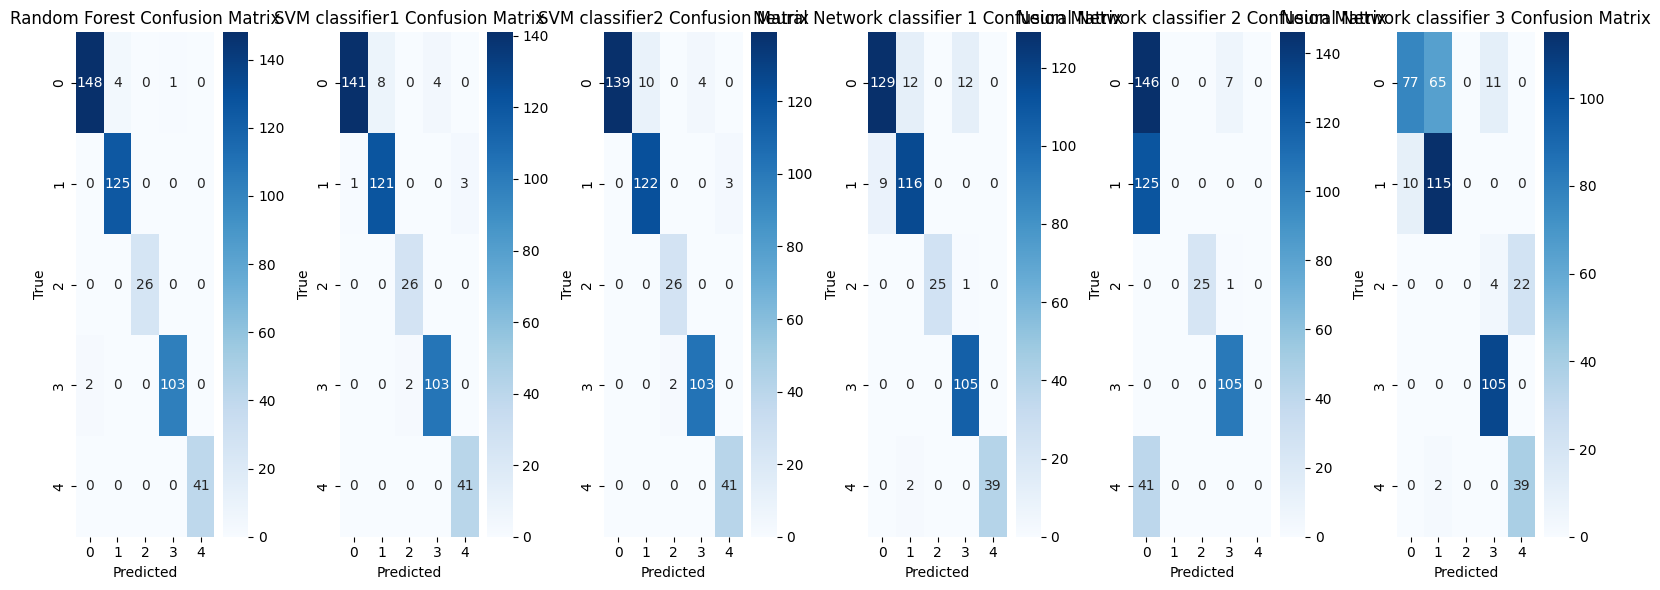


					Evaluating for UMAP features...
Evaluating Random Forest...
Overall Accuracy for Random Forest: 0.9778
 
 Classification Report:


precision    recall  f1-score     support
0              0.980132  0.967320  0.973684  153.000000
1              0.968504  0.984000  0.976190  125.000000
2              1.000000  0.961538  0.980392   26.000000
3              0.980952  0.980952  0.980952  105.000000
4              0.976190  1.000000  0.987952   41.000000
accuracy       0.977778  0.977778  0.977778    0.977778
macro avg      0.981156  0.978762  0.979834  450.000000
weighted avg   0.977882  0.977778  0.977764  450.000000

Evaluating SVM classifier1...
Overall Accuracy for SVM classifier1: 0.9467
 
 Classification Report:


precision    recall  f1-score     support
0              0.985915  0.915033  0.949153  153.000000
1              0.936508  0.944000  0.940239  125.000000
2              0.866667  1.000000  0.928571   26.000000
3              0.952830  0.961905  0.957346  105.000000
4              0.891304  1.000000  0.942529   41.000000
accuracy       0.946667  0.946667  0.946667    0.946667
macro avg      0.926645  0.964187  0.943568  450.000000
weighted avg   0.948961  0.946667  0.946796  450.000000

Evaluating SVM classifier2...
Overall Accuracy for SVM classifier2: 0.9489
 
 Classification Report:


precision    recall  f1-score     support
0              0.985915  0.915033  0.949153  153.000000
1              0.937008  0.952000  0.944444  125.000000
2              0.866667  1.000000  0.928571   26.000000
3              0.952830  0.961905  0.957346  105.000000
4              0.911111  1.000000  0.953488   41.000000
accuracy       0.948889  0.948889  0.948889    0.948889
macro avg      0.930706  0.965787  0.946601  450.000000
weighted avg   0.950905  0.948889  0.948962  450.000000

Evaluating Neural Network classifier 1...
Overall Accuracy for Neural Network classifier 1: 0.9578
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


precision    recall  f1-score     support
0              0.965986  0.928105  0.946667  153.000000
1              0.911111  0.984000  0.946154  125.000000
2              1.000000  0.961538  0.980392   26.000000
3              0.980769  0.971429  0.976077  105.000000
4              1.000000  0.951220  0.975000   41.000000
accuracy       0.957778  0.957778  0.957778    0.957778
macro avg      0.971573  0.959258  0.964858  450.000000
weighted avg   0.959257  0.957778  0.957917  450.000000

Evaluating Neural Network classifier 2...
Overall Accuracy for Neural Network classifier 2: 0.9089
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.966667  0.947712  0.957096  153.000000
1              0.931818  0.984000  0.957198  125.000000
2              0.000000  0.000000  0.000000   26.000000
3              0.790698  0.971429  0.871795  105.000000
4              1.000000  0.951220  0.975000   41.000000
accuracy       0.908889  0.908889  0.908889    0.908889
macro avg      0.737837  0.770872  0.752218  450.000000
weighted avg   0.863112  0.908889  0.883553  450.000000

Evaluating Neural Network classifier 3...
Overall Accuracy for Neural Network classifier 3: 0.8778
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.904459  0.928105  0.916129  153.000000
1              0.897810  0.984000  0.938931  125.000000
2              0.000000  0.000000  0.000000   26.000000
3              0.989247  0.876190  0.929293  105.000000
4              0.603175  0.926829  0.730769   41.000000
accuracy       0.877778  0.877778  0.877778    0.877778
macro avg      0.678938  0.743025  0.703024  450.000000
weighted avg   0.842688  0.877778  0.855714  450.000000

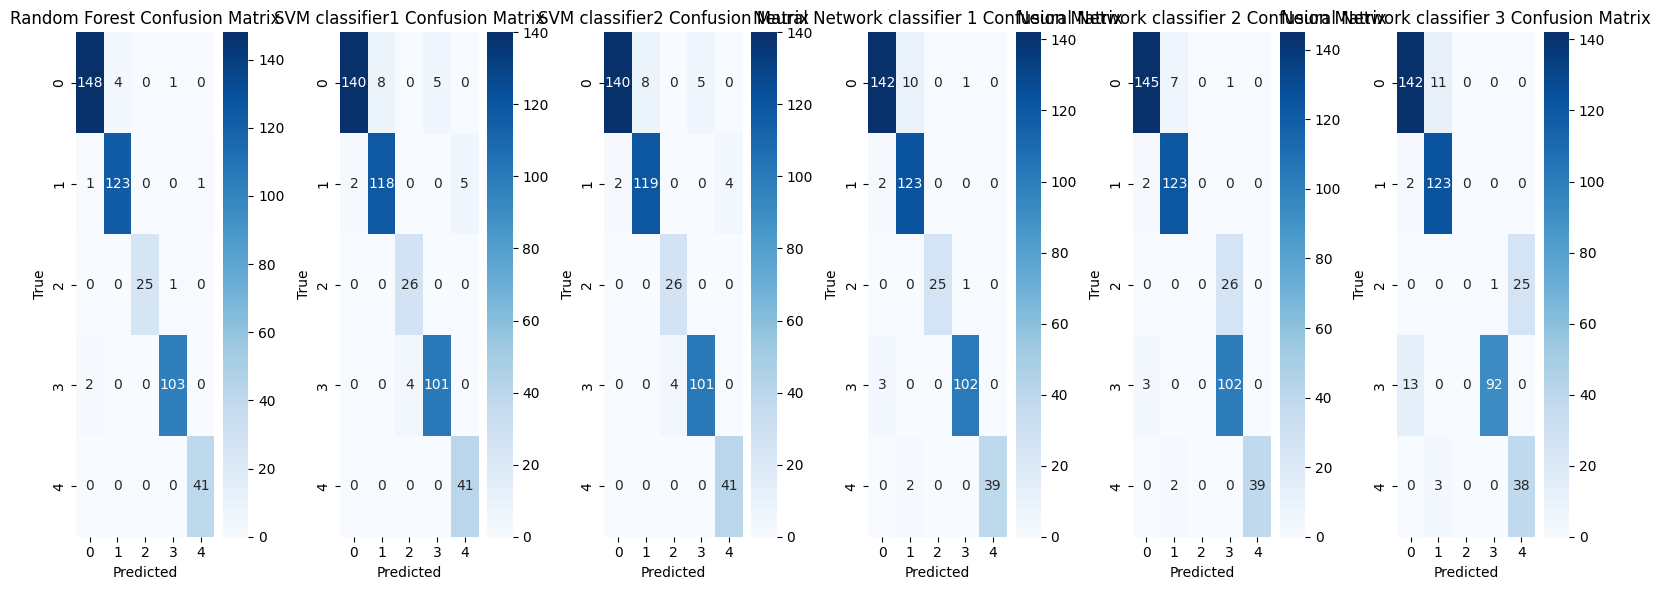

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

""" param_grid = {'min_samples_leaf': [1, 2, 5, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
 """
def evaluate_and_plot_classifiers(tsne_df, classifiers, results_dict):
    """
    Evaluates classifiers on the given DataFrame and plots confusion matrices.

    Parameters:
        tsne_df (pd.DataFrame): DataFrame containing features and target.
        classifiers (dict): Dictionary of classifier names and instances.
        results_dict (dict): Dictionary to store evaluation results.

    Returns:
        None
    """
    # Smin_sample_leaf(tsne_df, 'word2vec_cluster')
    for name, clf in classifiers.items():
        print(f"Evaluating {name}...")
        overall_accuracy, metrics_df, conf_matrix, y_proba, y_test  = evaluate_model(tsne_df, 'word2vec_cluster', clf)
        
        # Store results in a dictionary
        results_dict[name] = {
            "overall_accuracy": overall_accuracy,
            "metrics_df": metrics_df,
            "conf_matrix": conf_matrix,
            "y_proba": y_proba,
            "y_test": y_test
        }

        print(f"Overall Accuracy for {name}: {overall_accuracy:.4f}")
        print(" \n Classification Report:")
        display(metrics_df)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, len(classifiers), figsize=(16, 6))
    for idx, (name, clf) in enumerate(classifiers.items()):
        # Retrieve confusion matrix and true labels
        conf_matrix = results_dict[name]['conf_matrix']
        y_test = results_dict[name]['y_test']

        # Plot confusion matrix
        plot_confusion_matrix(axes[idx], conf_matrix, f"{name} Confusion Matrix", np.unique(y_test))

    plt.tight_layout()
    plt.show()



# Scale the t-SNE features
scaler = StandardScaler()
tsne_df[['tsne_feature_1', 'tsne_feature_2']] = scaler.fit_transform(tsne_df[['tsne_feature_1', 'tsne_feature_2']])


classifiers = {
    
    "Random Forest": RandomForestClassifier(min_samples_leaf=2, class_weight='balanced', random_state=42),
    "SVM classifier1": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),  # Enable probability for SVM
    "SVM classifier2": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
    "Neural Network classifier 1": MLPClassifier(hidden_layer_sizes=(5),random_state=42),
    "Neural Network classifier 2": MLPClassifier(hidden_layer_sizes=(5,5),random_state=42),
    "Neural Network classifier 3": MLPClassifier(hidden_layer_sizes=(5,5,5),random_state=42)
}
results_dict = {}

print("\n\t\t\t\t\t Evaluating for T-SNE features...")
# Call the method
evaluate_and_plot_classifiers(tsne_df, classifiers, results_dict)

print("\n\t\t\t\t\tEvaluating for UMAP features...")

# Scale the Umap features
results_dict = {}

scaler = StandardScaler()
umap_df[['umap_feature_1', 'umap_feature_2']] = scaler.fit_transform(umap_df[['umap_feature_1', 'umap_feature_2']])
evaluate_and_plot_classifiers(umap_df, classifiers, results_dict)